In [503]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']
import calendar
import pandas as pd
from functions import *
import statistics as st
import seaborn as sns
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats
from scipy.special import erf
%matplotlib inline
file_path=r'C:\\Users\\lehri\\Documents\\GitHub\\dust_solar_power\\'

In [2]:
'''
fig, ax = plt.subplots()
ax.set(title=r'This is an expression $e^{\sin(\omega\phi)}$',
       xlabel='meters $10^1$', ylabel=r'Hertz $(\frac{1}{s})$')
plt.show()
'''

"\nfig, ax = plt.subplots()\nax.set(title=r'This is an expression $e^{\\sin(\\omega\\phi)}$',\n       xlabel='meters $10^1$', ylabel=r'Hertz $(\x0crac{1}{s})$')\nplt.show()\n"

In [331]:
tceq_cams49_pm10_all=np.array([])
tceq_cams49_pm25_all=np.array([])
tceq_cams49_pm10_years=[]
tceq_cams49_pm25_years=[]
soiling_rates_pm25=[]
tceq_pm25_monthly_all=np.empty((3,12), float)
tceq_pm10_monthly_all=np.empty((3,12), float)
tceq_pm25_daily_mean=[]
tceq_pm10_daily_mean=[]
fig, ax= plt.subplots(figsize=(12,6))
ax.set_ylabel('PM Concentration [$μg/m^2$]')
ax.set_xlabel('Date')
plot_dict={2019:'r',2020:'g',2021:'b'}
for year in [2019,2020,2021]:
    file_name_cams49_pm25=f'CAMS49_{year}.xlsx'
    file_name_cams49_pm10=f'CAMS49_{year}_PM10.xlsx'
    tceq_cams49_pm25=read_xlsx_tecq(file_path+file_name_cams49_pm25)
    tceq_cams49_pm10=read_xlsx_tecq(file_path+file_name_cams49_pm10)  
    if year==2019:
        tceq_cams49_pm25_2019=tceq_cams49_pm25.copy(deep=True)
        tceq_cams49_pm10_2019=tceq_cams49_pm10.copy(deep=True)
    elif year==2020:
        tceq_cams49_pm25_2020=tceq_cams49_pm25.copy(deep=True)
        tceq_cams49_pm10_2020=tceq_cams49_pm10.copy(deep=True)
    else:
        tceq_cams49_pm25_2021=tceq_cams49_pm25.copy(deep=True)
        tceq_cams49_pm10_2021=tceq_cams49_pm10.copy(deep=True)
    #cleaned_tceq_cams49_pm25=tceq_cams49_pm25.values.flatten()[~np.isnan(tceq_cams49_pm25.values.flatten())]
    cleaned_tceq_cams49_pm25=[x for x in np.array(tceq_cams49_pm25.values.flatten()) if not np.isnan(x)]
    cleaned_tceq_cams49_pm10=[x for x in np.array(tceq_cams49_pm10.values.flatten()) if not np.isnan(x)]
    tceq_cams49_pm25_years.append(cleaned_tceq_cams49_pm25)
    tceq_cams49_pm10_years.append(cleaned_tceq_cams49_pm10)
    tceq_cams49_pm10_all=np.append(tceq_cams49_pm10_all,cleaned_tceq_cams49_pm10,axis=0)
    tceq_cams49_pm25_all=np.append(tceq_cams49_pm25_all,cleaned_tceq_cams49_pm25,axis=0)
    soiling_rates_pm25.append(tceq_cams49_pm25/tceq_cams49_pm25.max())
    print(f"Stats on {year} period")
    print("PM2.5 Mean: ",st.mean(cleaned_tceq_cams49_pm25))
    print("PM2.5 Median: ",st.median(cleaned_tceq_cams49_pm25))
    print("PM2.5 Mode: ", stats.mode(cleaned_tceq_cams49_pm25))
    print("PM2.5 N: ", len(cleaned_tceq_cams49_pm25))
    print("")
    print("PM10 Mean: ",st.mean(cleaned_tceq_cams49_pm10))
    print("PM10 Median: ",st.median(cleaned_tceq_cams49_pm10))
    print("PM10 Mode: ",stats.mode(cleaned_tceq_cams49_pm10))
    print("PM10 N: ", len(cleaned_tceq_cams49_pm10))

    #Beware that get_daily_mean addsa new column to the df inplace. We only need it to calcullate the monthly mean
    #nothing else should be calculated below these lines with the 'tceq_cams49_pm10/25' variable 
    tceq_pm10_daily_means=get_daily_mean(tceq_cams49_pm10)
    tceq_pm25_daily_means=get_daily_mean(tceq_cams49_pm25)
    tceq_pm25_daily_mean.append(tceq_pm25_daily_means)
    tceq_pm10_daily_mean.append(tceq_pm10_daily_means)
    print(tceq_cams49_pm10)
    tceq_pm10_monthly_means=get_monthly_mean(tceq_pm10_daily_means)
    tceq_pm25_monthly_means=get_monthly_mean(tceq_pm25_daily_means)
    tceq_pm10_monthly_all[year-2019]=tceq_pm10_monthly_means
    tceq_pm25_monthly_all[year-2019]=tceq_pm25_monthly_means
    #ax.plot(tceq_cams49_pm10.reset_index()['Daily'], label='PM2.5')
    #ax.plot(tceq_cams49_pm25.reset_index()['Daily'], label='PM10')
    ax.plot(tceq_pm10_monthly_means, label=f'PM10 {year}', color=plot_dict[year])
    ax.plot(tceq_pm25_monthly_means, label=f'PM2.5 {year}', color=plot_dict[year], linestyle='dashed')
    

ax.set_xticks(np.arange(12),calendar.month_name[1:13], rotation=330 )
ax.legend()
ax.grid()

print("Stats on whole study period")
print("PM2.5 Mean: ",st.mean(tceq_cams49_pm25_all))
print("PM2.5 Median: ",st.median(tceq_cams49_pm25_all))
print("PM2.5 Mode: ", stats.mode(tceq_cams49_pm25_all))
print("PM2.5 Kurtosis: ", stats.kurtosis(tceq_cams49_pm25_all, axis=0, fisher=True, bias=True, nan_policy='propagate'))
print("PM2.5 N: ", len(tceq_cams49_pm25_all))
print("")
print("PM10 Mean: ",st.mean(tceq_cams49_pm10_all))
print("PM10 Median: ",st.median(tceq_cams49_pm10_all))
print("PM10 Mode: ",stats.mode(tceq_cams49_pm10_all))
print("PM10 Kurtosis: ", stats.kurtosis(tceq_cams49_pm10_all, axis=0, fisher=True, bias=True, nan_policy='propagate'))
print("PM10 N: ", len(tceq_cams49_pm10_all))


Stats on 2019 period
PM2.5 Mean:  6.897067651812514
PM2.5 Median:  5.3
PM2.5 Mode:  ModeResult(mode=4.0, count=126)
PM2.5 N:  8662

PM10 Mean:  30.423477157360406
PM10 Median:  21.05
PM10 Mode:  ModeResult(mode=17.6, count=50)
PM10 N:  8668
            00:00:00  01:00:00  02:00:00  03:00:00  04:00:00  05:00:00  \
Date                                                                     
2019-01-01      41.5      44.2      39.7      35.9      33.1      28.8   
2019-01-02       9.6      10.7       9.7       9.0       9.5      10.5   
2019-01-03       9.7       9.6       7.9       8.0       9.4       9.1   
2019-01-04      25.8      23.1      16.2      16.5      21.0      10.4   
2019-01-05      30.8      27.9      23.6      20.6      21.6      19.7   
...              ...       ...       ...       ...       ...       ...   
2019-12-27      14.0      16.1      14.7      12.0      16.1      17.6   
2019-12-28       7.5       7.5       7.0       6.3       6.0       6.9   
2019-12-29       7.

In [4]:
tceq_pm10_export=tceq_cams49_pm10_years
tceq_pm25_export=tceq_cams49_pm25_years
%store tceq_pm10_daily_mean
%store tceq_pm25_daily_mean
%store tceq_pm10_export
%store tceq_pm25_export
%store tceq_pm10_monthly_all
%store tceq_pm25_monthly_all
%store soiling_rates_pm25

Stored 'tceq_pm10_daily_mean' (list)
Stored 'tceq_pm25_daily_mean' (list)
Stored 'tceq_pm10_export' (list)
Stored 'tceq_pm25_export' (list)
Stored 'tceq_pm10_monthly_all' (ndarray)
Stored 'tceq_pm25_monthly_all' (ndarray)
Stored 'soiling_rates_pm25' (list)


In [48]:
#fig, ax= plt.subplots(figsize=(12,6))

#tceq_cams49_pm10_2019.groupby(air_quality["datetime"].dt.hour)["value"].mean().plot(kind='bar', rot=0, ax=ax)


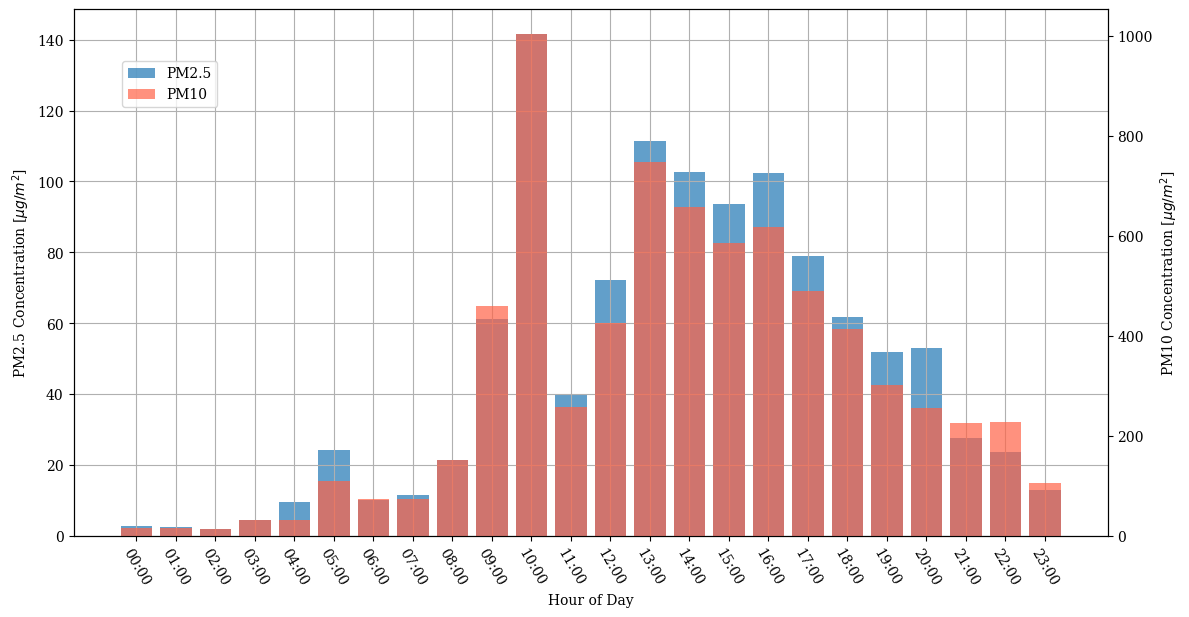

In [50]:
fig, ax= plt.subplots(figsize=(12,6))
ax.set_ylabel('PM2.5 Concentration [$μg/m^2$]')
ax.set_xlabel('Hour of Day')
ax2=ax.twinx()
ax2.set_ylabel('PM10 Concentration [$μg/m^2$]')
ax2.bar(pd.date_range(start='00:00',end='23:00',freq='h').strftime('%H:%M'),tceq_cams49_pm10_2019[tceq_cams49_pm10_2019.index=='2019-04-10'].values.flatten(),label="PM10",color='tomato',alpha=0.7)
ax.bar(pd.date_range(start='00:00',end='23:00',freq='h').strftime('%H:%M'),tceq_cams49_pm25_2019[tceq_cams49_pm25_2019.index=='2019-04-10'].values.flatten(),label="PM2.5",alpha=0.7)
fig.tight_layout()
fig.legend(loc='upper left', bbox_to_anchor=(0.1,0.9))
ax.grid()
ax.set_xticks(np.arange(24),pd.date_range(start='00:00',end='23:00',freq='h').strftime('%H:%M'),rotation=300)
plt.show()

C:\Users\lehri\AppData\Local\Temp\ipykernel_155232\1512636487.py:6: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ax.set_xticks(np.arange(24),pd.date_range(start='00:00',end='23:00',freq='1H').strftime('%H:%M'), rotation=330 )


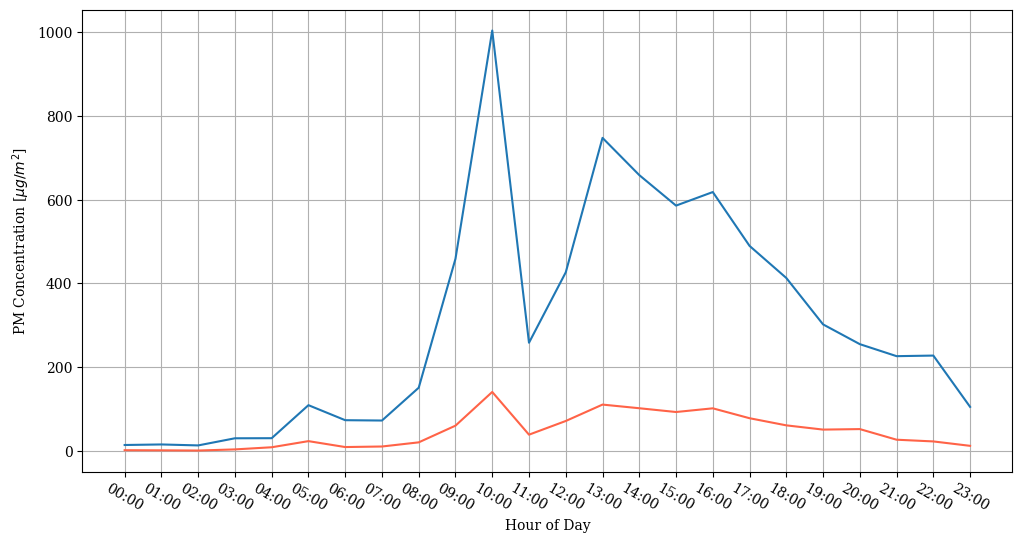

In [6]:
fig, ax= plt.subplots(figsize=(12,6))
ax.set_ylabel('PM Concentration [$μg/m^2$]')
ax.set_xlabel('Hour of Day')
ax.plot(tceq_cams49_pm25_2019[tceq_cams49_pm25_2019.index=='2019-04-10'].values.flatten(), label='PM2.5',color='tomato')
ax.plot(tceq_cams49_pm10_2019[tceq_cams49_pm10_2019.index=='2019-04-10'].values.flatten(), label='PM10')
ax.set_xticks(np.arange(24),pd.date_range(start='00:00',end='23:00',freq='1H').strftime('%H:%M'), rotation=330 )
ax.grid()

In [7]:
len(tceq_cams49_pm10_2019[tceq_cams49_pm25_2019.index.month == 4].values.flatten())

720

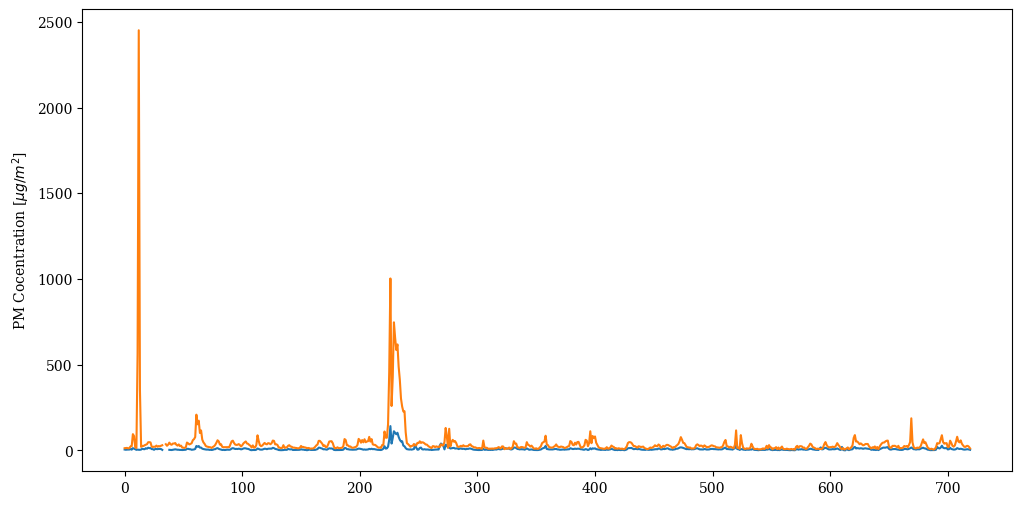

In [8]:
fig, ax= plt.subplots(figsize=(12,6))
ax.set_ylabel('PM Cocentration [$μg/m^2$]')
ax.plot(tceq_cams49_pm25_2019[tceq_cams49_pm25_2019.index.month == 4].values.flatten(), label='PM2.5')
ax.plot(tceq_cams49_pm10_2019[tceq_cams49_pm10_2019.index.month == 4].values.flatten(), label='PM10')
#ax.set_xticks(np.arange(30),pd.date_range(start='2019-04-01',end='2019-04-30',freq='D'), rotation=330 )


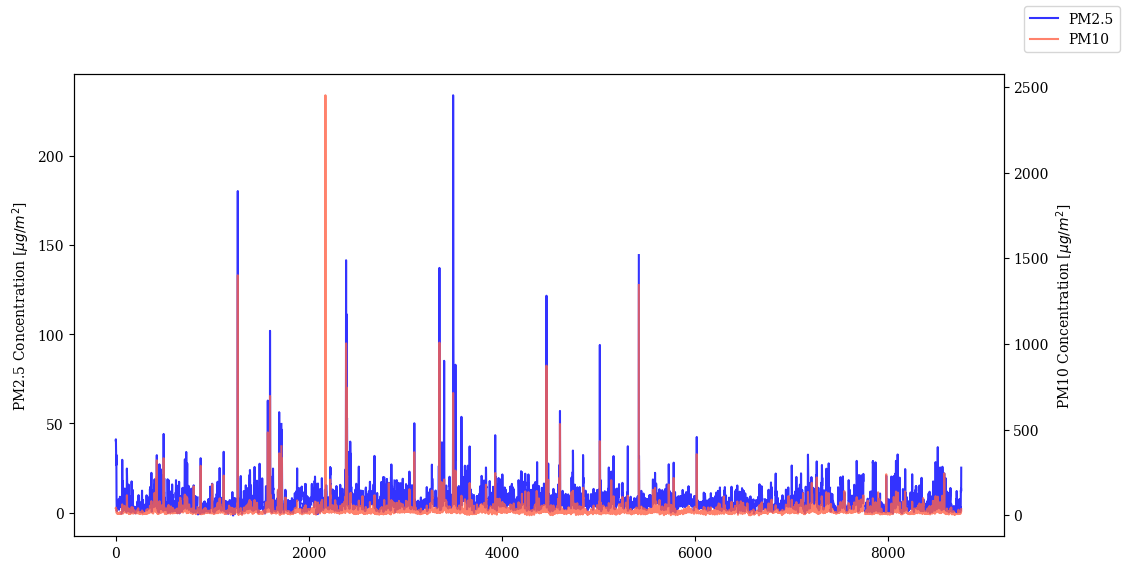

In [9]:
fig, ax= plt.subplots(figsize=(12,6))
ax.set_ylabel('PM2.5 Concentration [$μg/m^2$]')
ax2=ax.twinx()
ax2.set_ylabel('PM10 Concentration [$μg/m^2$]')

ax.plot(tceq_cams49_pm25_2019.values.flatten(), label='PM2.5',color='blue',alpha=0.8)
ax2.plot(tceq_cams49_pm10_2019.values.flatten(), label='PM10',color='tomato',alpha=0.8)
fig.legend()


In [543]:
%store tceq_cams49_pm10_2019
%store tceq_cams49_pm10_2020
%store tceq_cams49_pm10_2021

%store tceq_cams49_pm25_2019
%store tceq_cams49_pm25_2020
%store tceq_cams49_pm25_2021

Stored 'tceq_cams49_pm10_2019' (DataFrame)
Stored 'tceq_cams49_pm10_2020' (DataFrame)
Stored 'tceq_cams49_pm10_2021' (DataFrame)
Stored 'tceq_cams49_pm25_2019' (DataFrame)
Stored 'tceq_cams49_pm25_2020' (DataFrame)
Stored 'tceq_cams49_pm25_2021' (DataFrame)
